## Grupo 5 - WH6 - R
### Integrantes
- Diego
- Teresa
- Yoberson

# 1. Plots 

- **Graficos de  distribución absoluta, frecuencia y densidades de los pesos de los recién nacidos si la madre es fumadora o no**

Importamos los datos

In [1]:
library(ggplot2)  # plots packages
library(tidyr) # read and filter dataset
library(tidyverse)
library(haven)  # read STATA.dta 
library(dplyr)  # filter dataset

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.6     v dplyr   1.0.8
v readr   2.1.2     v stringr 1.4.0
v purrr   0.3.4     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
peso <- read_dta("../../data/Pesos/peso.dta", encoding = "latin1")

In [3]:
head(peso)

faminc cigtax cigprice bwght fatheduc motheduc parity male white cigs
1 13.5   16.5   122.3    109   12       12       1      1    1     0   
2  7.5   16.5   122.3    133    6       12       2      1    0     0   
3  0.5   16.5   122.3    129   NA       12       2      0    0     0   
4 15.5   16.5   122.3    126   12       12       2      1    0     0   
5 27.5   16.5   122.3    134   14       12       2      1    1     0   
6  7.5   16.5   122.3    118   12       14       6      1    0     0   
  lbwght   bwghtlbs packs lfaminc   
1 4.691348 6.8125   0      2.6026900
2 4.890349 8.3125   0      2.0149031
3 4.859812 8.0625   0     -0.6931472
4 4.836282 7.8750   0      2.7408400
5 4.897840 8.3750   0      3.3141861
6 4.770685 7.3750   0      2.0149031

In [4]:
#Creamos dummy "fumador" que indique si la madre es fumadora o no fumadora
peso$fumador <- (peso$cigs > 0)*1
# 1 si la madre es fumadora
# 0 si la madre no es fumadora

In [5]:
peso <- peso %>% mutate(fumador = case_when(fumador == 1 ~ "Madre Fumadora",
                                          fumador == 0 ~ "Madre No Fumadora"))

Multiples histogramas de los pesos de los recipen nacidos

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



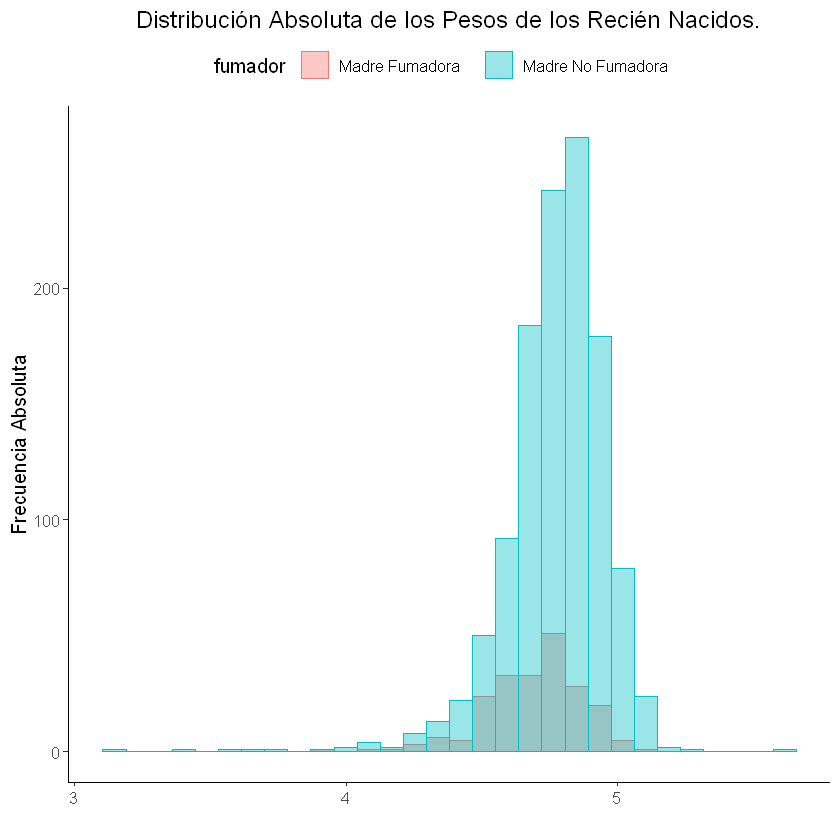

In [13]:

### Multiple histograms
theme_set(theme_classic() + theme(legend.position = "top"))

peso %>% 
 ggplot(aes(x=lbwght)) + geom_histogram(aes(color = fumador, fill = fumador),
                         alpha = 0.4, position = "identity") +
    labs(x = " ", y = "Frecuencia Absoluta", title = "Distribución Absoluta de los Pesos de los Recién Nacidos.") + 
     theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5)) 

Histogramas separados de los pesos de los recién nacidos

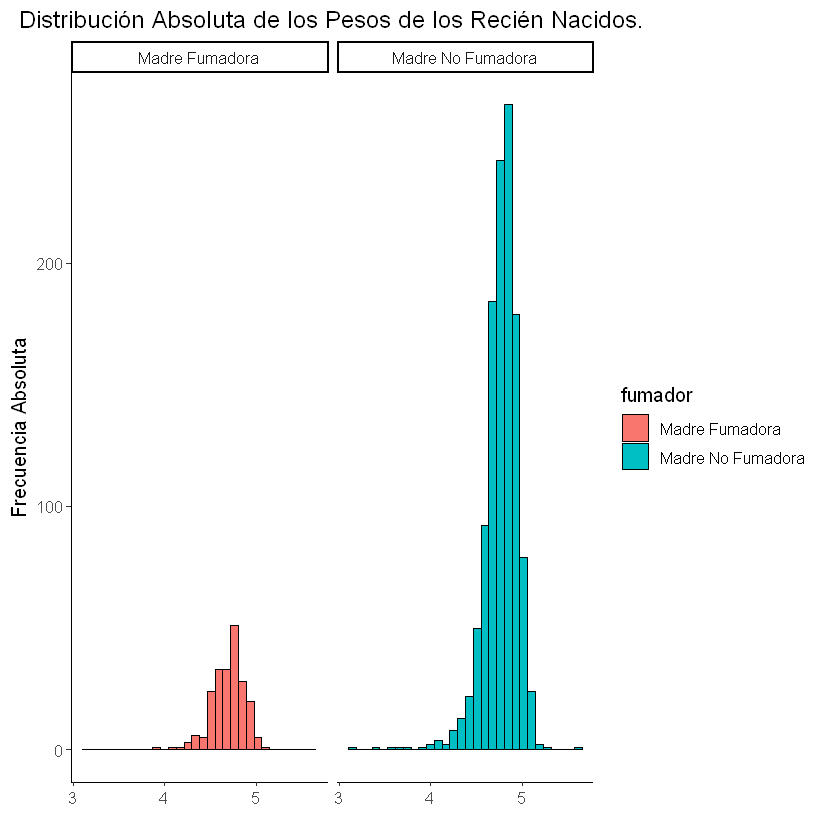

In [11]:
theme_set(theme_classic() + theme(legend.position = "right"))

peso %>% 
 ggplot(aes(x=lbwght)) + geom_histogram(aes(fill = fumador), bins = 30, color ="black") +
    labs(x = " ", y = "Frecuencia Absoluta", title = "Distribución Absoluta de los Pesos de los Recién Nacidos.") + 
     theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5)) +
    facet_wrap(~fumador)

Densidad de los pesos de los recién nacidos

Warning message:
"Ignoring unknown parameters: bins"


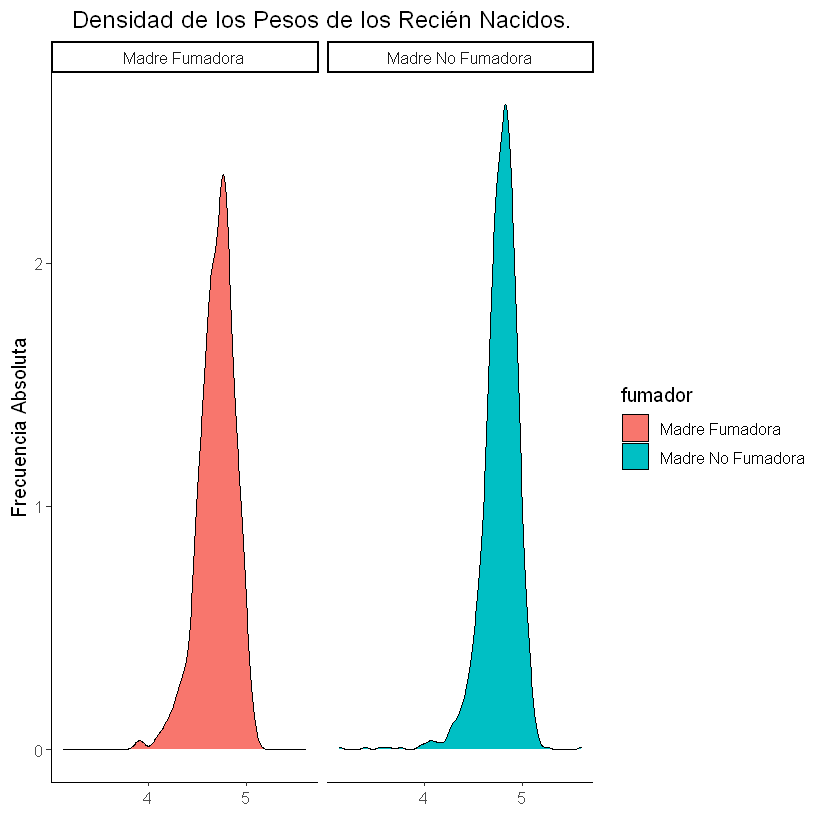

In [12]:
theme_set(theme_classic() + theme(legend.position = "right"))

peso %>% 
 ggplot(aes(x=lbwght)) + geom_density(aes(fill = fumador), bins = 30) +
    labs(x = " ", y = "Frecuencia Absoluta", title = "Densidad de los Pesos de los Recién Nacidos.") + 
     theme(text=element_text(size =12), plot.title = element_text(hjust = 0.5)) +
    facet_wrap(~fumador)

**Crear un coefplot de las siguientes tres regresiones:**
- lbwght ~ Dummy
- lbwght ~ Dummy + mothedu
- lbwght~ Dummy + mothedu + lfaminc + white + Dummy:(mothedu + lfaminc + white)

# 2. Regular expresión y Geocoding